In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as plx
import json

%matplotlib inline

In [36]:
df_test =  pd.read_csv("data/Test.csv")
df_train =  pd.read_csv("data/Train.csv")

### Columns
- DATOP - Date of flight
- FLTID - Flight number
- DEPSTN - Departure point
- ARRSTN - Arrival point
- STD - Scheduled Time departure
- STA - Scheduled Time arrival
- STATUS - Flight status
- ETD - Expected Time departure
- ETA - Expected Time arrival
- ATD - Actual Time of Departure
- ATA - Actual Time of arrival
- DELAY1 - Delay code 1
- DUR1 - delay time 1
- DELAY2 - Delay code 2
- DUR2 - delay time 2
- DELAY3 - Delay code 3
- DUR3 - delay time 3
- DELAY4 - Delay code 4
- DUR4 - delay time 4
- AC - Aircraft Code

In [3]:
df_test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [4]:
df_train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


### EDA of the train data

In [5]:
df_train.STATUS.value_counts()

STATUS
ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: count, dtype: int64

In [6]:
df_train.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


In [7]:
df_train.info(), df_train.isnull().sum(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


(None,
 ID        0
 DATOP     0
 FLTID     0
 DEPSTN    0
 ARRSTN    0
 STD       0
 STA       0
 STATUS    0
 AC        0
 target    0
 dtype: int64)

In [8]:
df_train.dtypes

ID         object
DATOP      object
FLTID      object
DEPSTN     object
ARRSTN     object
STD        object
STA        object
STATUS     object
AC         object
target    float64
dtype: object

In [9]:


df_train.head(3)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0


In [ ]:
df_train.groupby('STATUS')['target'].agg(['mean', 'median', 'count', 'std']).sort_values(by='count', ascending=False).reset_index()
df_train

,STATUS,mean,median,count,std
0,ATA,55.655099,19.0,93679,123.262956
1,SCH,0.000000,0.0,13242,0.000000
2,DEP,44.462527,0.0,467,111.052651
3,RTR,69.894558,17.0,294,218.832893
4,DEL,0.000000,0.0,151,0.000000


In [ ]:
df_train = df_train[~df_train['STATUS'].isin(['SCH', 'DEL'])]
df_train


In [12]:
df_test["airline_code"] = df_test['FLTID'].str.split(' ').str[0]
df_test["flt_num"] = df_test['FLTID'].str.split(' ').str[1]
# df_train.drop(columns=["FLTID"], axis=1, inplace=True)

# df_train["AC_airline_code"] = df_train['AC'].str.split(' ').str[0]
df_test["AC_num"] = df_test['AC'].str.split(' ').str[1].str[:3]

df_test["route"] = df_test["DEPSTN"] + "-" + df_test["ARRSTN"]

df_test = df_test.drop('ID', axis=1)

df_test["AC_num"].unique()

array(['32A', '320', '31B', '736', 'CR9', '332', '31A', 'AT7', '733',
       '734', '321', '345', '343'], dtype=object)

In [13]:
df_test["AC_num"].unique()

array(['32A', '320', '31B', '736', 'CR9', '332', '31A', 'AT7', '733',
       '734', '321', '345', '343'], dtype=object)

In [38]:
df_train["airline_code"] = df_train['FLTID'].str.split(' ').str[0]
df_train["flt_num"] = df_train['FLTID'].str.split(' ').str[1]
# df_train.drop(columns=["FLTID"], axis=1, inplace=True)

# df_train["AC_airline_code"] = df_train['AC'].str.split(' ').str[0]
df_train["AC_num"] = df_train['AC'].str.split(' ').str[1].str[:3]

df_train["route"] = df_train["DEPSTN"] + "-" + df_train["ARRSTN"]

df_train = df_train.drop('ID', axis=1)

df_train

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,airline_code,flt_num,AC_num,route
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,TU,0712,32A,CMN-TUN
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,TU,0757,31B,MXP-TUN
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,TU,0214,32A,TUN-IST
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,TU,0480,736,DJE-NTE
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,TU,0338,320,TUN-ALG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,WKL,0000,32A,TUN-TUN
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,UG,0003,AT7,DJE-TUN
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,SGT,0000,736,TUN-TUN
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,UG,0010,CR9,TUN-DJE


In [15]:
train_unique_ac_nums = df_train["AC_num"].unique()
present = pd.Series(train_unique_ac_nums).isin(df_test["AC_num"])
train_unique_ac_nums[~present]

array(['738', '319', 'M87'], dtype=object)

In [ ]:
def duration_to_minutes_int(duration_str):
    """Converts a 'D days HH:MM:SS' duration string to total minutes as an integer."""
    parts = re.match(r'(\d+) days (\d{2}):(\d{2}):(\d{2})', duration_str)
    if parts:
        days, hours, minutes, seconds = map(int, parts.groups())
        total_minutes = (days * 24 * 60) + (hours * 60) + minutes + round(seconds / 60)
        return int(total_minutes)
    return None

In [58]:
# Date Time conversion and splitting
# df_train["STA"] = df_train['STA'].str.replace(".", ":")

df_train["STA"] = pd.to_datetime(df_train["STA"])
df_train["STD"] = pd.to_datetime(df_train["STD"])
df_train["DATOP"] = pd.to_datetime(df_train["DATOP"], format='%Y-%m-%d')

df_train["STD_duration"] = df_train['STA'] - df_train['STD']
df_train["duration_min"] = df_train["STD_duration"].dt.total_seconds().astype("Int64") / 60

df_train["STA_day"] = df_train['STA'].dt.day_of_week.astype(int)
df_train["STA_month"] = df_train['STA'].dt.month.astype(int)
df_train["STA_hour"] = df_train['STA'].dt.hour.astype(int)


df_train["STD_day"] = df_train['STD'].dt.day_of_week
df_train["STD_month"] = df_train['STD'].dt.month
df_train["STD_hour"] = df_train['STD'].dt.hour



df_train["DATOP"] = df_train["DATOP"].dt.date

df_train.head(3)

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,airline_code,...,AC_num,route,STD_duration,STA_day,STA_month,STA_hour,STD_day,STD_month,STD_hour,duration_min
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,TU,...,32A,CMN-TUN,0 days 02:25:00,6,1,12,6,1,10,145.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,TU,...,31B,MXP-TUN,0 days 01:50:00,2,1,16,2,1,15,110.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,TU,...,32A,TUN-IST,0 days 02:35:00,5,1,6,5,1,4,155.0


In [17]:
grouped_routes = df_train.groupby('route')['target'].agg(['mean', 'median', 'count', 'std']).sort_values(by='count', ascending=False).reset_index()
grouped_DEP = df_train.groupby('DEPSTN')['target'].agg(['mean', 'median', 'count', 'std']).sort_values(by='count', ascending=False).reset_index()
grouped_ARR = df_train.groupby('ARRSTN')['target'].agg(['mean', 'median', 'count', 'std']).sort_values(by='count', ascending=False).reset_index()
grouped_DEP.head(5)

,DEPSTN,mean,median,count,std
0,TUN,54.560955,21.0,34673,105.025757
1,DJE,40.945809,3.0,7086,129.694855
2,ORY,51.893737,23.0,6738,88.522452
3,MIR,36.942904,0.0,4904,125.464508
4,MRS,57.536104,20.0,2839,111.613306


In [ ]:
grouped_routes

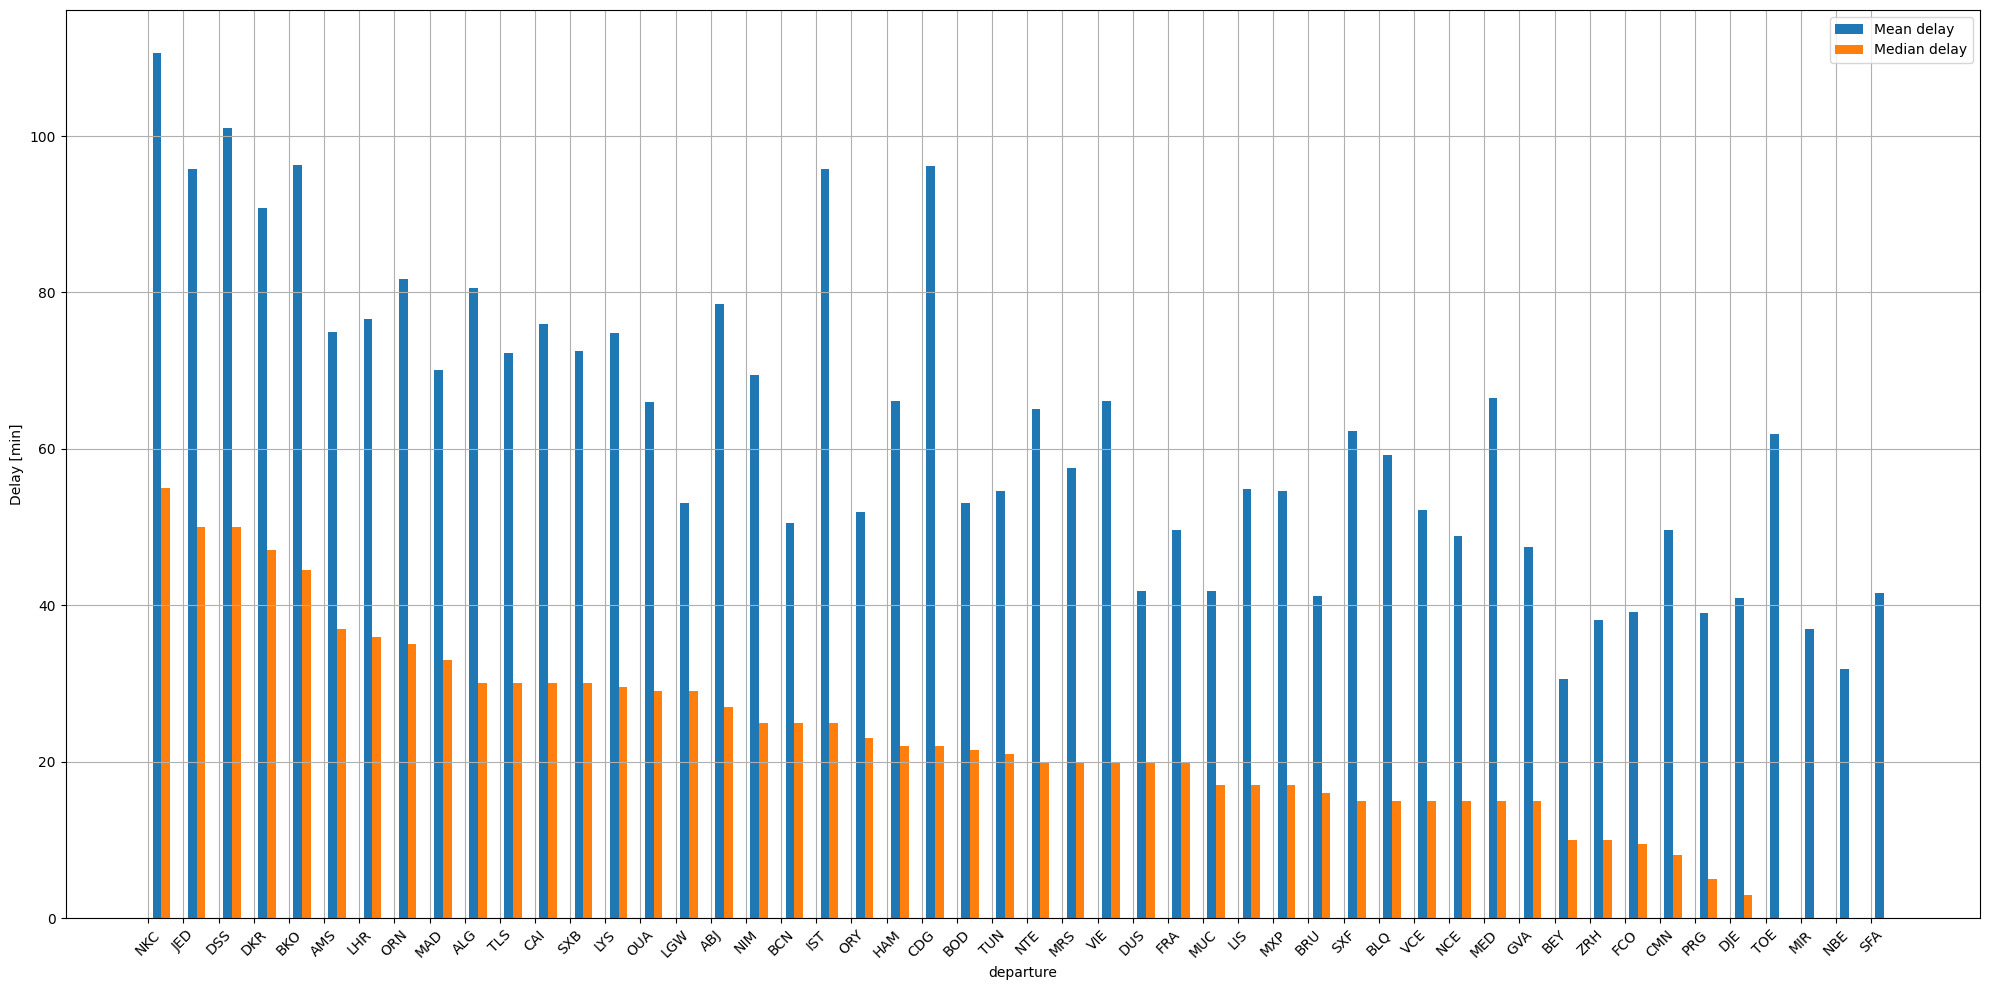

In [35]:
plt.figure(figsize=(20, 10))

top_frequent_DEP = grouped_DEP.head(50)
top_frequent_DEP = top_frequent_DEP.sort_values(by="median", ascending=False)

bar_width = 0.25
x = np.arange(len(top_frequent_DEP['DEPSTN']))

plt.bar(x, top_frequent_DEP['mean'], bar_width, label='Mean delay')
plt.bar(x + bar_width, top_frequent_DEP['median'], bar_width, label='Median delay')

plt.xlabel('departure')
plt.ylabel('Delay [min]')
plt.xticks(x - bar_width, top_frequent_DEP['DEPSTN'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

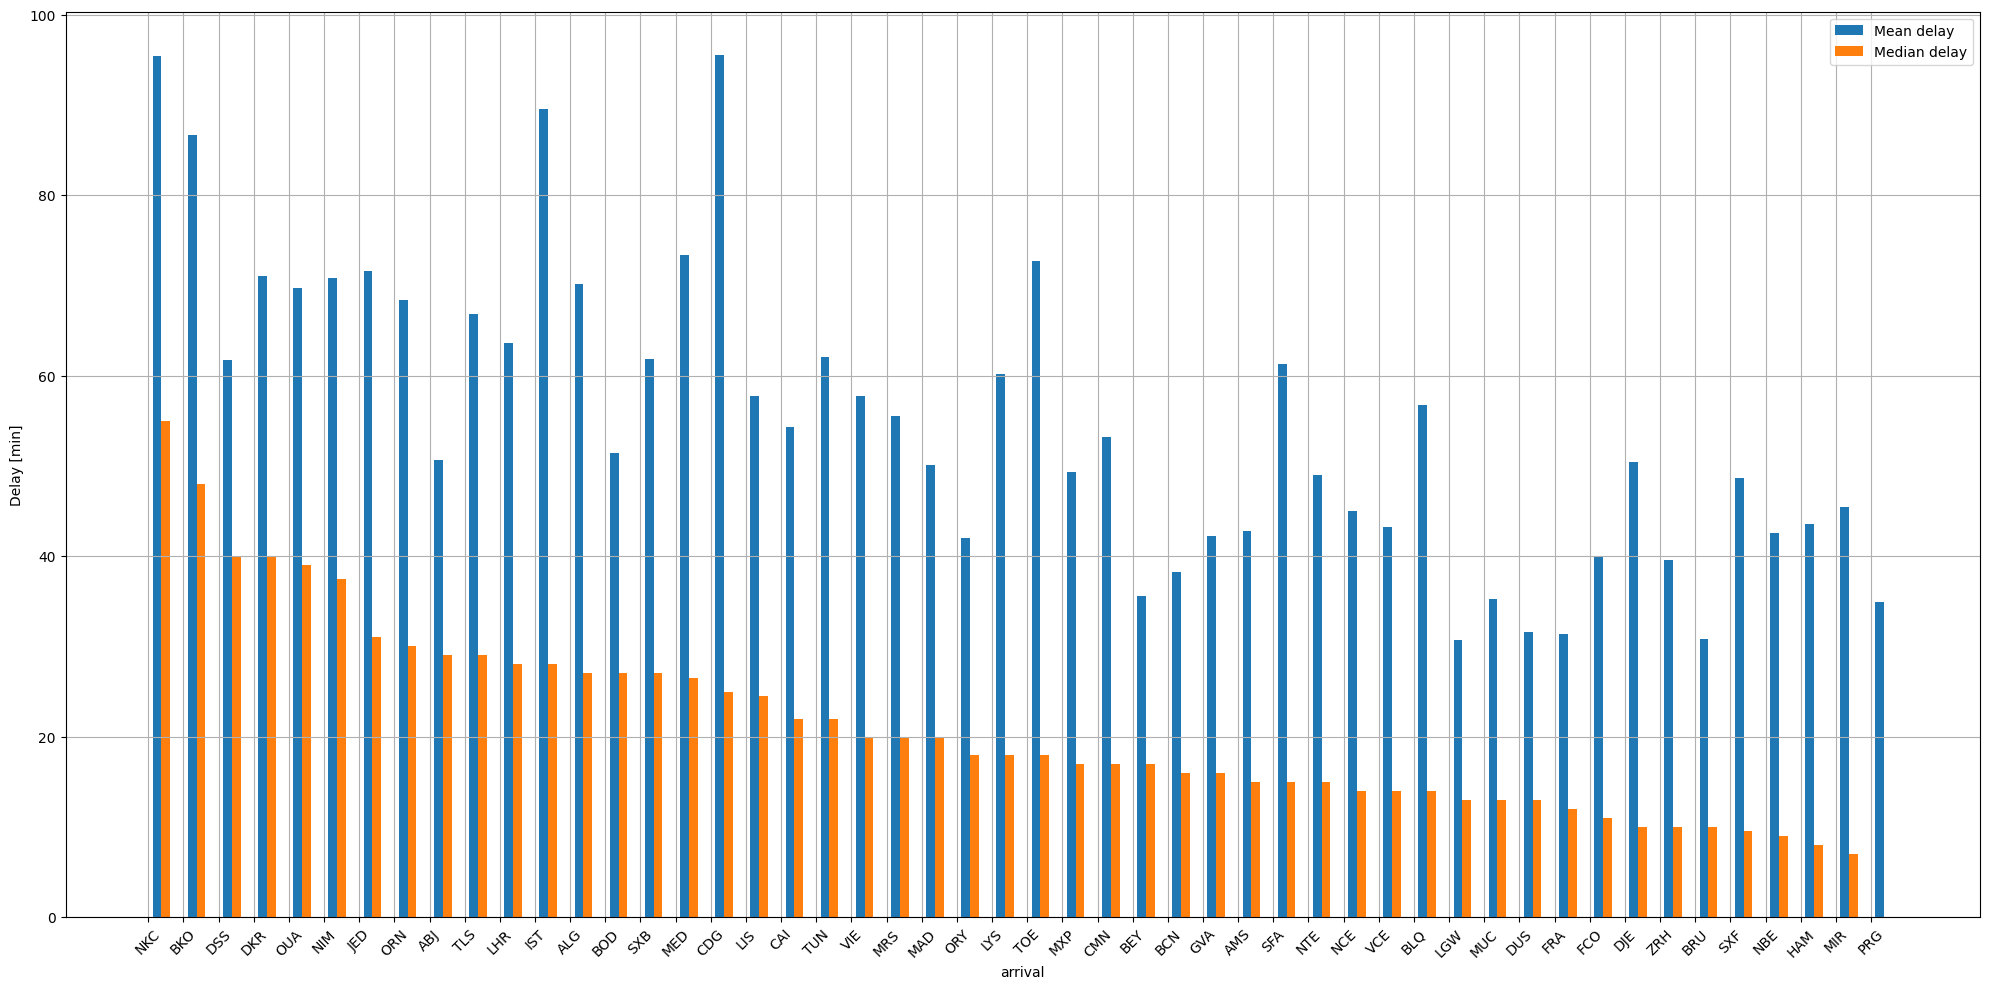

In [41]:
plt.figure(figsize=(20, 10))

top_frequent_ARR = grouped_ARR.head(50)
top_frequent_ARR = top_frequent_ARR.sort_values(by="median", ascending=False)

bar_width = 0.25
x = np.arange(len(top_frequent_ARR['ARRSTN']))

plt.bar(x, top_frequent_ARR['mean'], bar_width, label='Mean delay')
plt.bar(x + bar_width, top_frequent_ARR['median'], bar_width, label='Median delay')

plt.xlabel('arrival')
plt.ylabel('Delay [min]')
plt.xticks(x - bar_width, top_frequent_ARR['ARRSTN'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

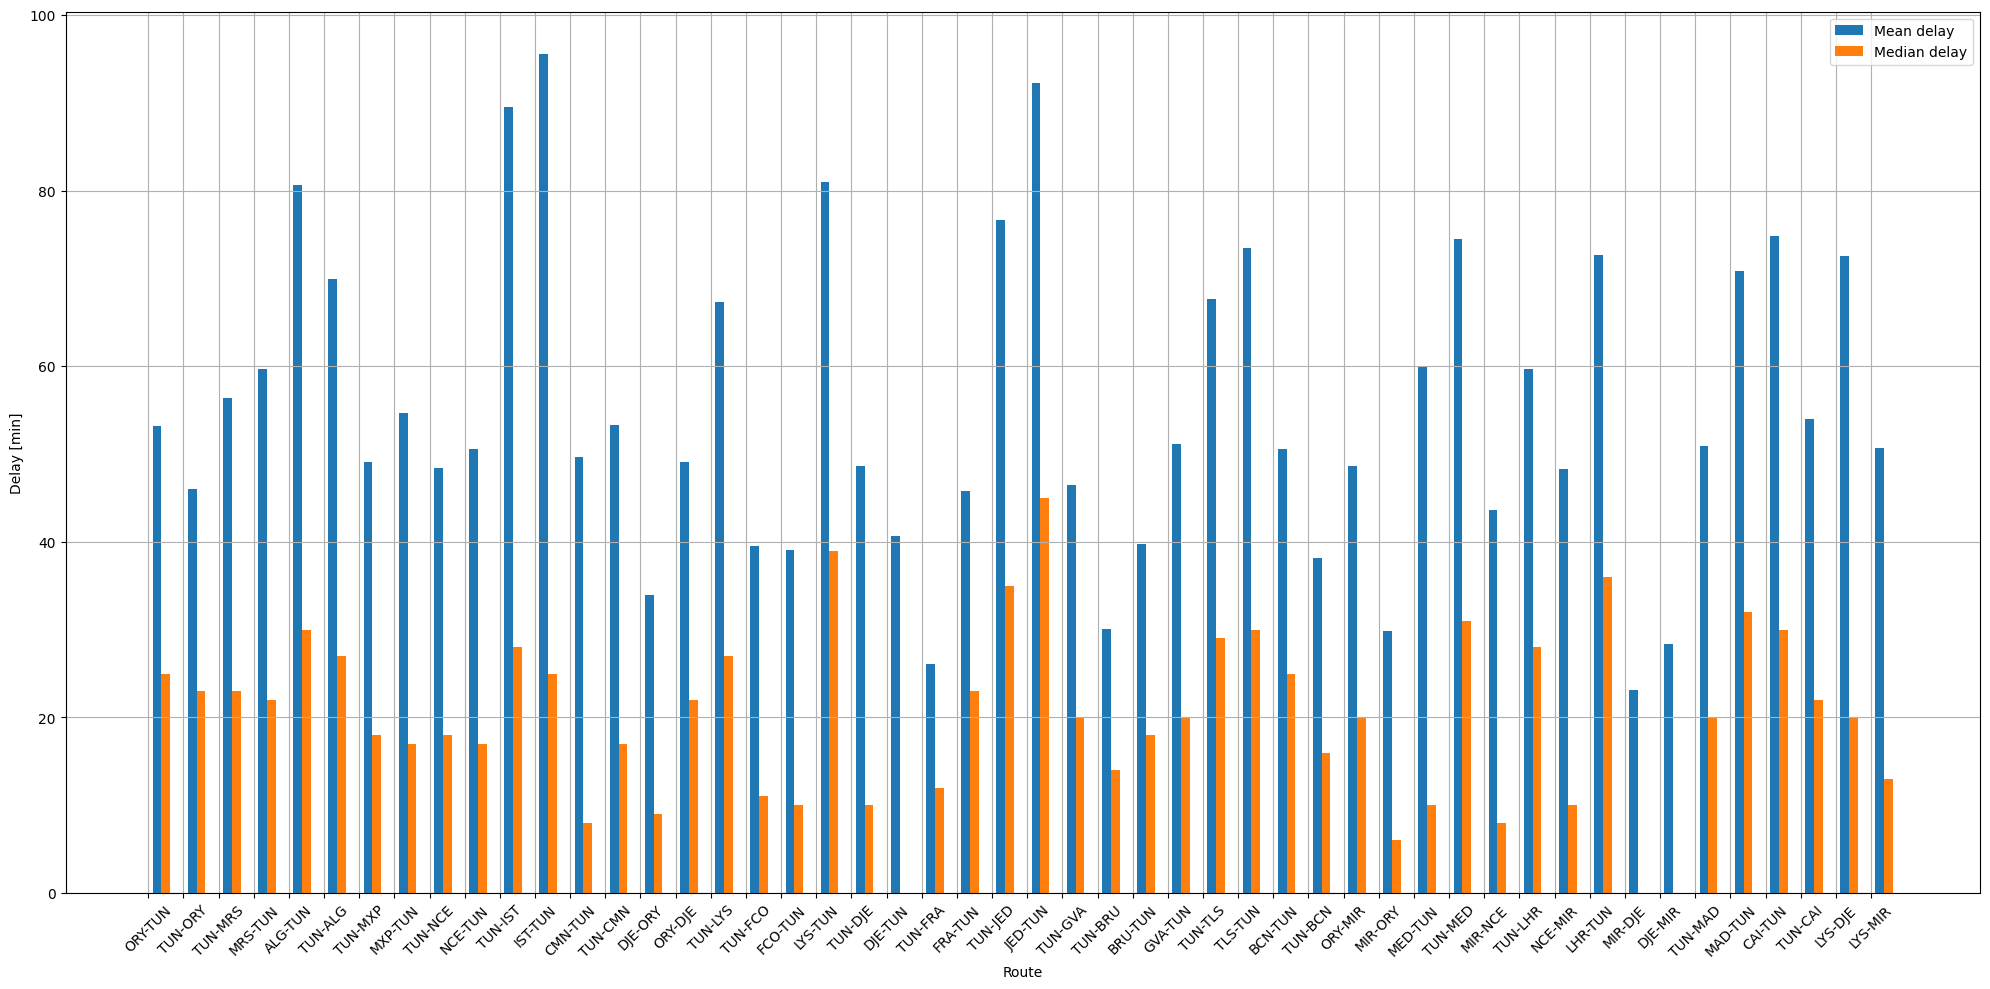

In [19]:
plt.figure(figsize=(20, 10))

top_frequent_routes = grouped_routes.head(50)

bar_width = 0.25
x = np.arange(len(top_frequent_routes['route']))

plt.bar(x, top_frequent_routes['mean'], bar_width, label='Mean delay')
plt.bar(x + bar_width, top_frequent_routes['median'], bar_width, label='Median delay')

plt.xlabel('Route')
plt.ylabel('Delay [min]')
plt.xticks(x - bar_width, top_frequent_routes['route'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1800x900 with 0 Axes>

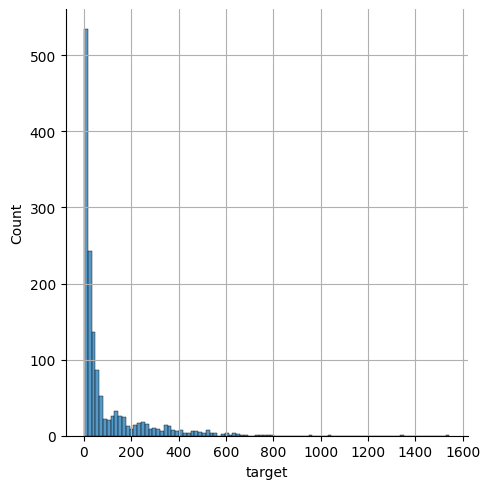

In [20]:
plt.figure(figsize=(18, 9))
sns.displot(df_train[df_train["route"] == "TUN-IST"].target)
plt.grid()
plt.show()

In [61]:
grouped_AC = df_train.groupby('AC_num')['target'].agg(['mean', 'median', 'count', 'std']).sort_values(by='count', ascending=False).reset_index()
grouped_AC




,AC_num,mean,median,count,std
0,32A,57.710807,18.0,32767,130.157296
1,320,58.737628,22.0,27743,121.398102
2,736,39.173858,8.0,20695,114.842815
3,31B,32.963973,10.0,6967,79.970964
4,AT7,1.024358,0.0,5255,17.500856
5,332,74.455046,33.0,4905,123.320416
6,CR9,6.904968,0.0,3704,46.600197
7,31A,32.450244,5.0,3487,88.024466
8,733,35.759292,15.0,565,54.978804
9,734,116.427807,45.0,561,211.717481


In [71]:

bins = [0, 60, 120, 180, 240, 300, 360, 420, float('inf')]
labels = ['0-60 min', '61-120 min', '121-180 min', '181 - 240 min', '241 - 300 min', '301 - 360 min', '361 - 420 min', '420+ min']
df_train['duration_bins'] = pd.cut(df_train['duration_min'], bins=bins, labels=labels, right=False)

grouped = df_train.groupby(['AC_num', 'duration_bins'])['target'].agg(['mean', 'median', 'std', 'count']).reset_index()
grouped

,AC_num,duration_bins,mean,median,std,count
0,319,0-60 min,3.730769,0.0,8.435912,26
1,319,61-120 min,NaN,NaN,NaN,0
2,319,121-180 min,42.748988,15.0,90.755018,247
3,319,181 - 240 min,121.800000,0.0,272.353080,5
4,319,241 - 300 min,NaN,NaN,NaN,0
...,...,...,...,...,...,...
123,M87,181 - 240 min,NaN,NaN,NaN,0
124,M87,241 - 300 min,NaN,NaN,NaN,0
125,M87,301 - 360 min,NaN,NaN,NaN,0
126,M87,361 - 420 min,NaN,NaN,NaN,0


c:\Users\mlaps\neuefische\flight_delay_project\.venv\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


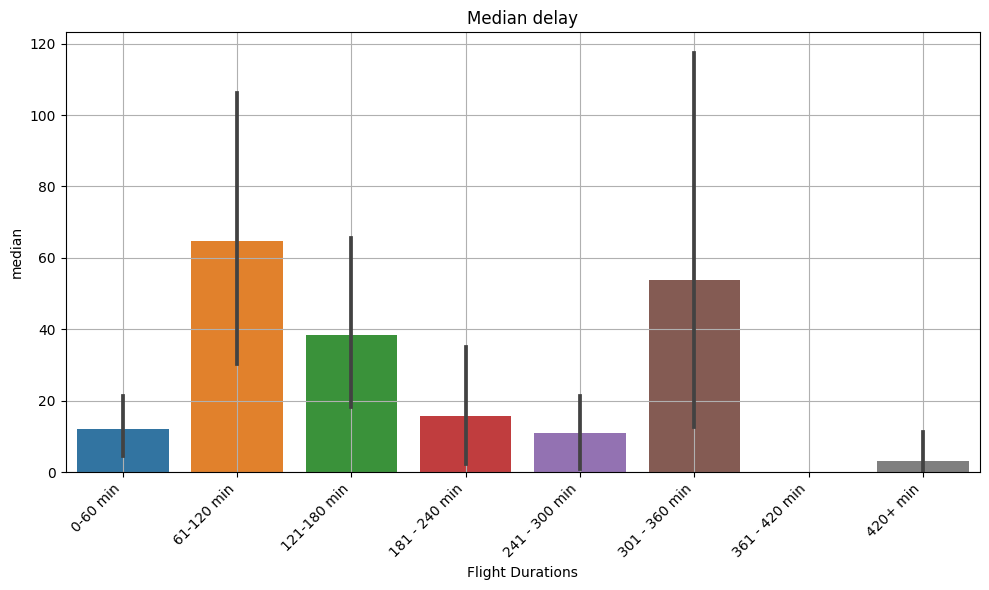

In [80]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='duration_bins', y='median', data=grouped)
plt.title('Median delay')
plt.xlabel('Flight Durations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

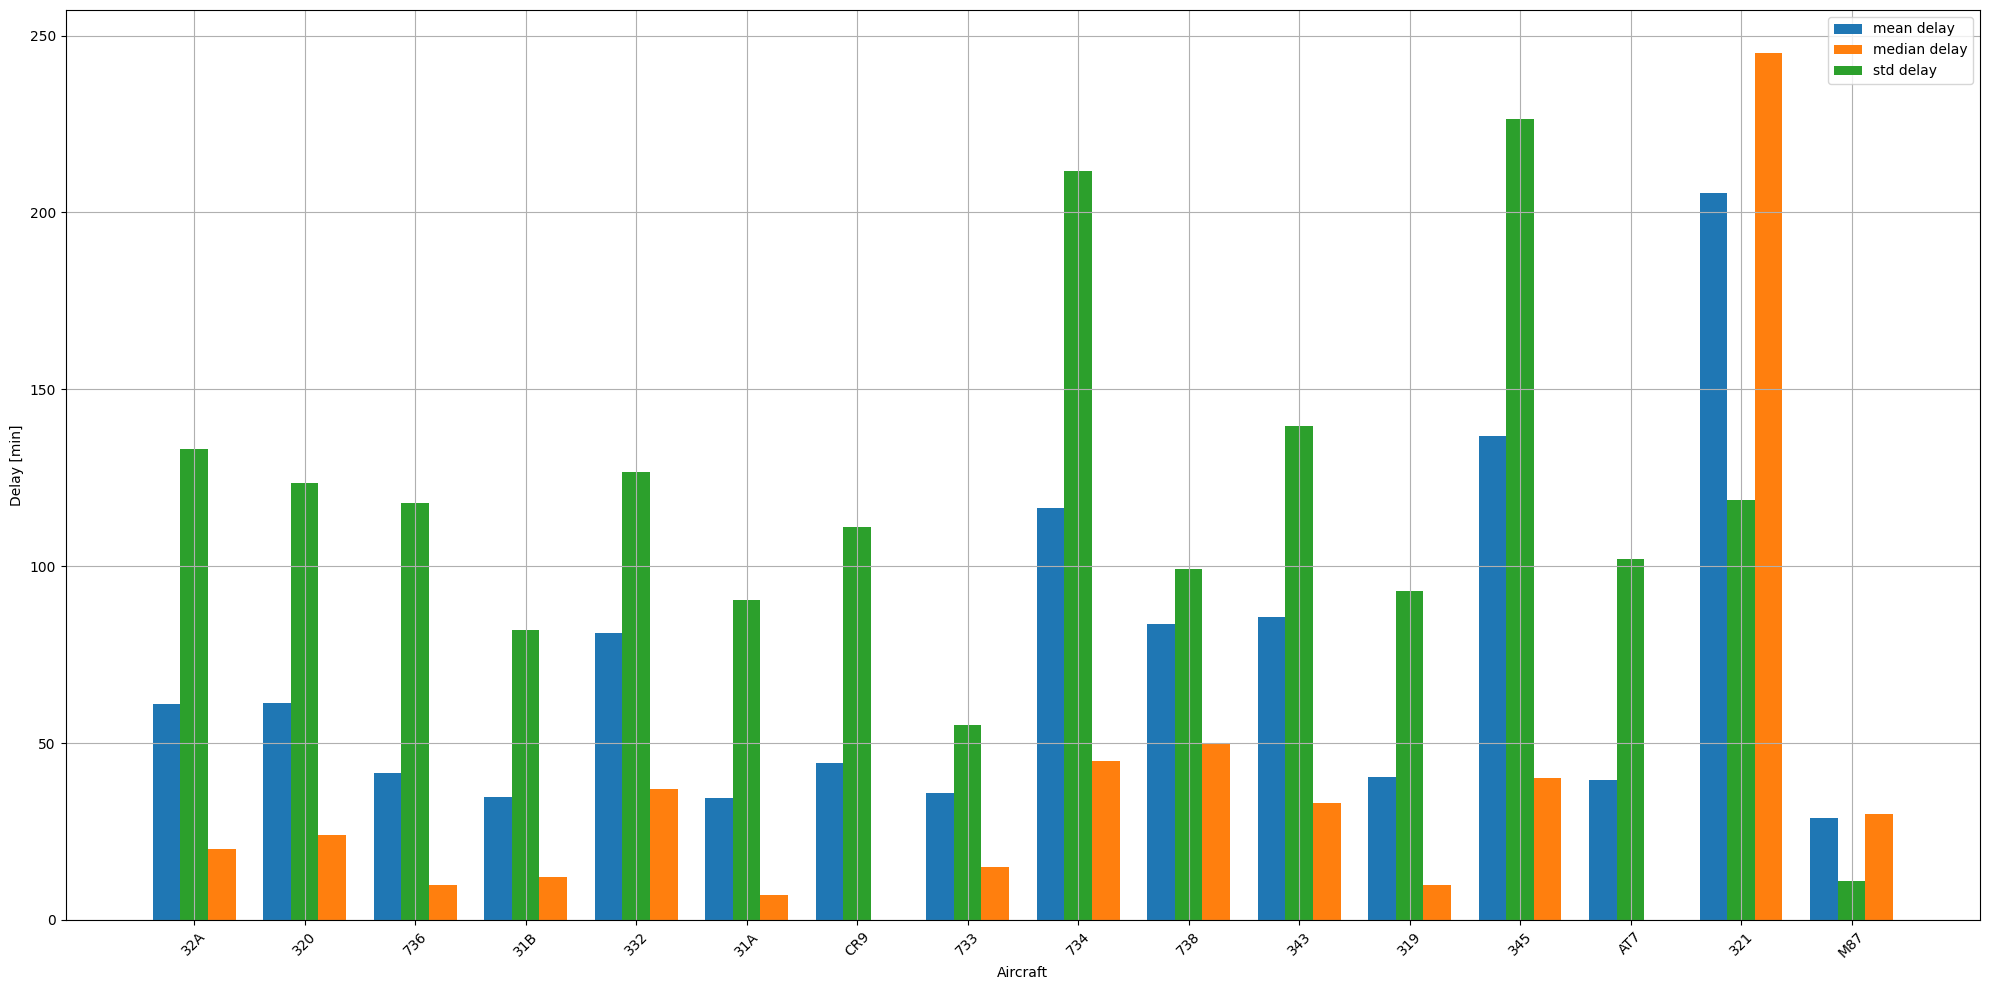

In [22]:
plt.figure(figsize=(20, 10))

top_AC = grouped_AC

bar_width = 0.25
x = np.arange(len(top_AC['AC_num']))

plt.bar(x - bar_width, top_AC['mean'], bar_width, label='mean delay')
plt.bar(x + bar_width, top_AC['median'], bar_width, label='median delay')
plt.bar(x, top_AC['std'], bar_width, label='std delay')

plt.xlabel('Aircraft')
plt.ylabel('Delay [min]')
plt.xticks(x, top_AC['AC_num'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<Axes: xlabel='AC_num', ylabel='median'>

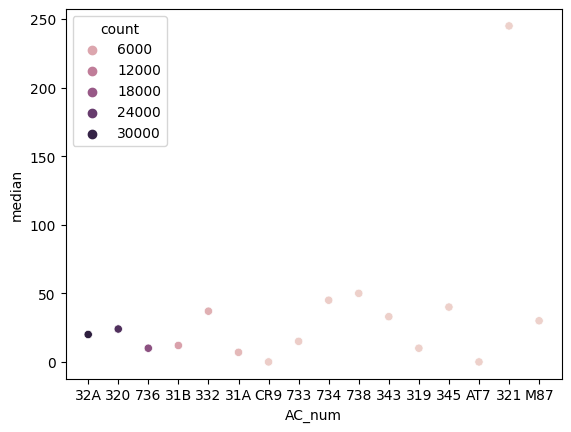

In [60]:
grouped_AC= grouped_AC.sort_values(by="count", ascending=False)
sns.scatterplot(data=grouped_AC, x= "AC_num", y="median", hue="count")

<Axes: xlabel='AC_num', ylabel='target'>

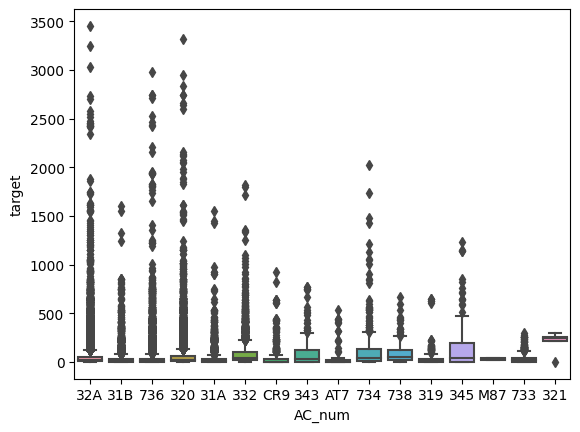

In [23]:
sns.boxplot(x= df_train["AC_num"], y=df_train["target"])

In [24]:
# status_dummies = pd.get_dummies(df_train.STATUS, drop_first=True)
# df_train = pd.concat([df_train, status_dummies], axis=1)


# df_train.head()


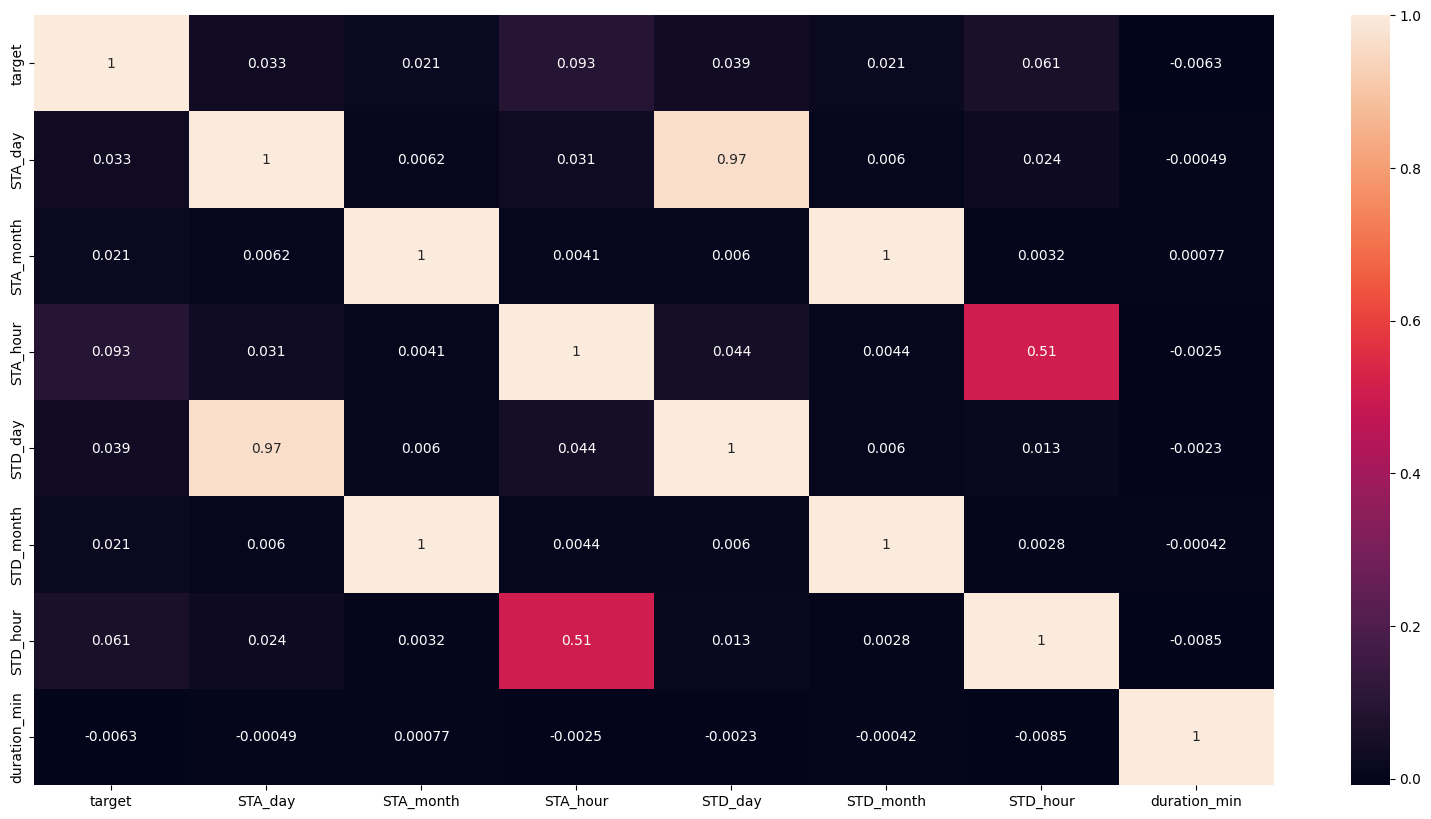

In [59]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True)
plt.show()

In [26]:
df_train[df_train.target > 0 ].value_counts()

DATOP       FLTID     DEPSTN  ARRSTN  STD                  STA                  STATUS  AC         target  airline_code  flt_num  AC_num  route    STA_day  STA_month  STA_hour  STD_day  STD_month  STD_hour
2016-01-01  TU 0216   TUN     IST     2016-01-01 16:00:00  2016-01-01 18:35:00  ATA     TU 320IMU  184.0   TU            0216     320     TUN-IST  4        1          18        4        1          16          1
2018-01-28  TU 0848   BEY     TUN     2018-01-28 11:35:00  2018-01-28 15:10:00  ATA     TU 320IMS  5.0     TU            0848     320     BEY-TUN  6        1          15        6        1          11          1
            TU 0996   TUN     NCE     2018-01-28 07:50:00  2018-01-28 09:20:00  ATA     TU 32AIMN  24.0    TU            0996     32A     TUN-NCE  6        1          9         6        1          7           1
            TU 0931   MRS     TUN     2018-01-28 09:50:00  2018-01-28 11:25:00  ATA     TU 320IMV  38.0    TU            0931     320     MRS-TUN  6        1    

In [28]:
# (df_train.flt_num[df_train.target > 0 ].value_counts() / df_train.flt_num.value_counts()) * 100

### Locations


In [90]:

with open('Airports-master/airports.json', 'r') as f:
    data = json.load(f)

airports = []
for airport_code, details in data.items():
    record = {
        'iata': details.get('iata', ''),
        'country': details.get('country', ''),
        'lon': details.get('lon', None),
        'lat': details.get('lat', None)
    }
    airports.append(record)


df_airports = pd.DataFrame(airports)

df_airports


,iata,country,lon,lat
0,,US,-151.695999,59.949200
1,,US,-86.770302,34.864799
2,,US,-112.165001,34.305599
3,,US,-116.888000,35.350498
4,,US,-121.763428,39.427189
...,...,...,...,...
29262,TNH,CN,125.703333,42.253889
29263,SHE,CN,123.483002,41.639801
29264,XEN,CN,120.697998,40.580299
29265,YNJ,CN,129.451004,42.882801


In [97]:
# First merge for departure
df_train_locations = df_train.merge(
    df_airports[['iata', 'lat', 'lon', 'country']],
    left_on='DEPSTN',
    right_on='iata',
    how='left'
).rename(columns={
    'lat': 'DEP_lat',
    'lon': 'DEP_lon',
    'country': 'DEP_country'
}).drop(columns=['iata'])  # Drop redundant 'iata' after merge

# Second merge for arrival
df_train_locations = df_train_locations.merge(
    df_airports[['iata', 'lat', 'lon', 'country']],
    left_on='ARRSTN',
    right_on='iata',
    how='left'
).rename(columns={
    'lat': 'ARR_lat',
    'lon': 'ARR_lon',
    'country': 'ARR_country'
}).drop(columns=['iata'])  # Drop redundant 'iata' after second merge

# View the result
df_train_locations.head()


,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,airline_code,...,STD_month,STD_hour,duration_min,duration_bins,DEP_lat,DEP_lon,DEP_country,ARR_lat,ARR_lon,ARR_country
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,TU,...,1,10,145.0,121-180 min,33.367500,-7.58997,MA,36.851002,10.227200,TN
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,TU,...,1,15,110.0,61-120 min,45.630600,8.72811,IT,36.851002,10.227200,TN
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,TU,...,1,4,155.0,121-180 min,36.851002,10.22720,TN,41.262222,28.727778,TR
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,TU,...,1,14,170.0,121-180 min,33.875000,10.77550,TN,47.153198,-1.610730,FR
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,TU,...,1,14,80.0,61-120 min,36.851002,10.22720,TN,36.691002,3.215410,DZ


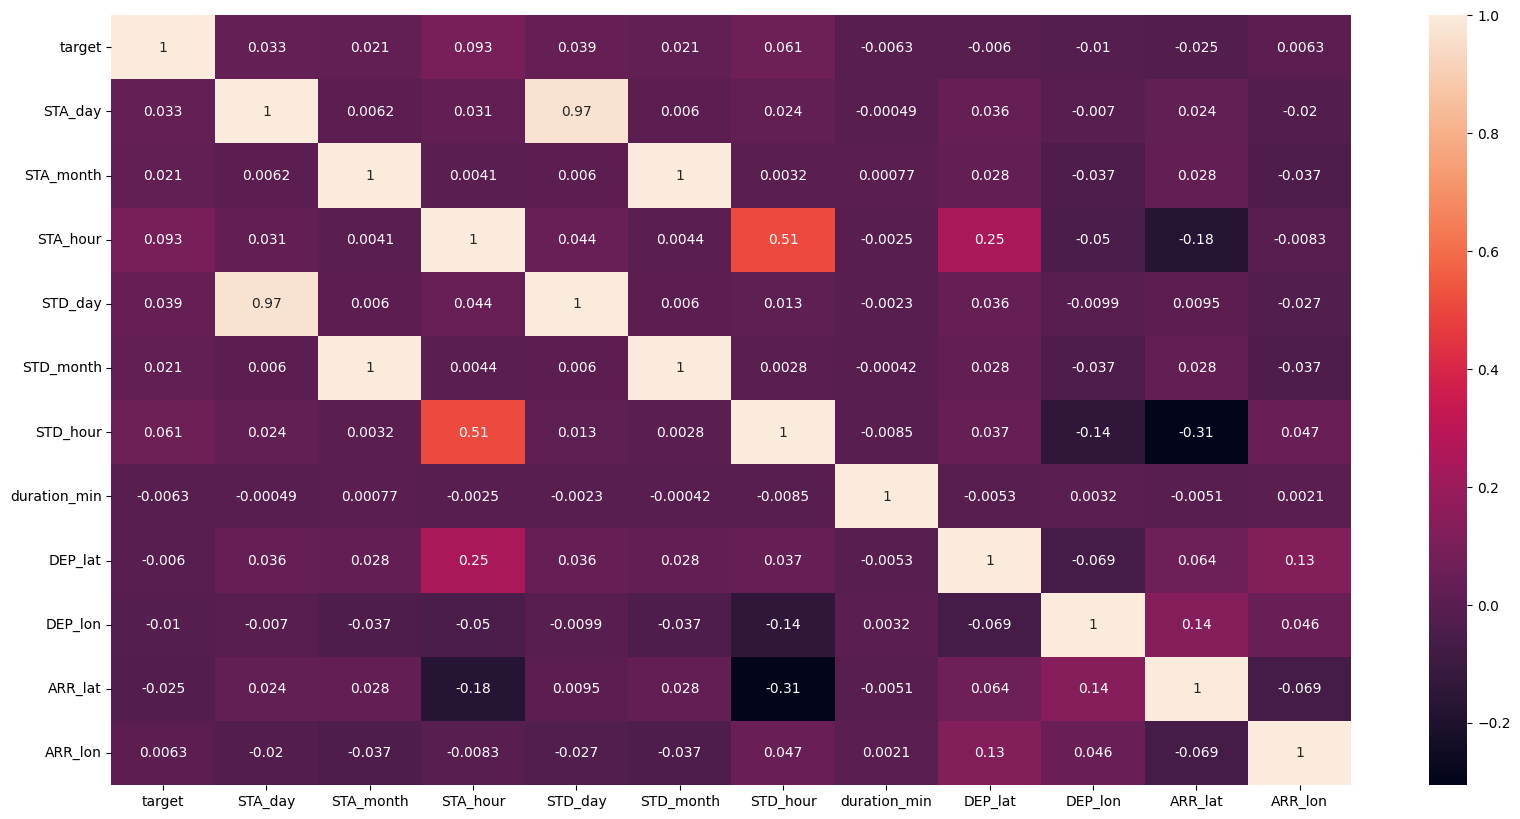

In [98]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_train_locations.corr(numeric_only=True), annot=True)
plt.show()

In [107]:
grouped_DEP_country = df_train_locations.groupby('DEP_country')['target'].agg(['mean', 'median', 'count', 'std']).sort_values(by='count', ascending=False).reset_index()
grouped_DEP_country


,DEP_country,mean,median,count,std
0,TN,40.126412,9.0,61450,103.184311
1,FR,59.386353,21.0,17704,124.680756
2,IT,45.658881,10.0,4110,100.793464
3,DE,48.478992,20.0,3332,139.404882
4,DZ,83.427362,35.0,2244,142.858168
5,SA,83.759875,35.0,1924,139.193553
6,MA,41.991817,6.0,1833,100.994981
7,CH,44.928668,14.0,1486,129.320156
8,TR,96.457084,25.0,1468,170.072554
9,BE,41.228346,16.0,1397,96.661789


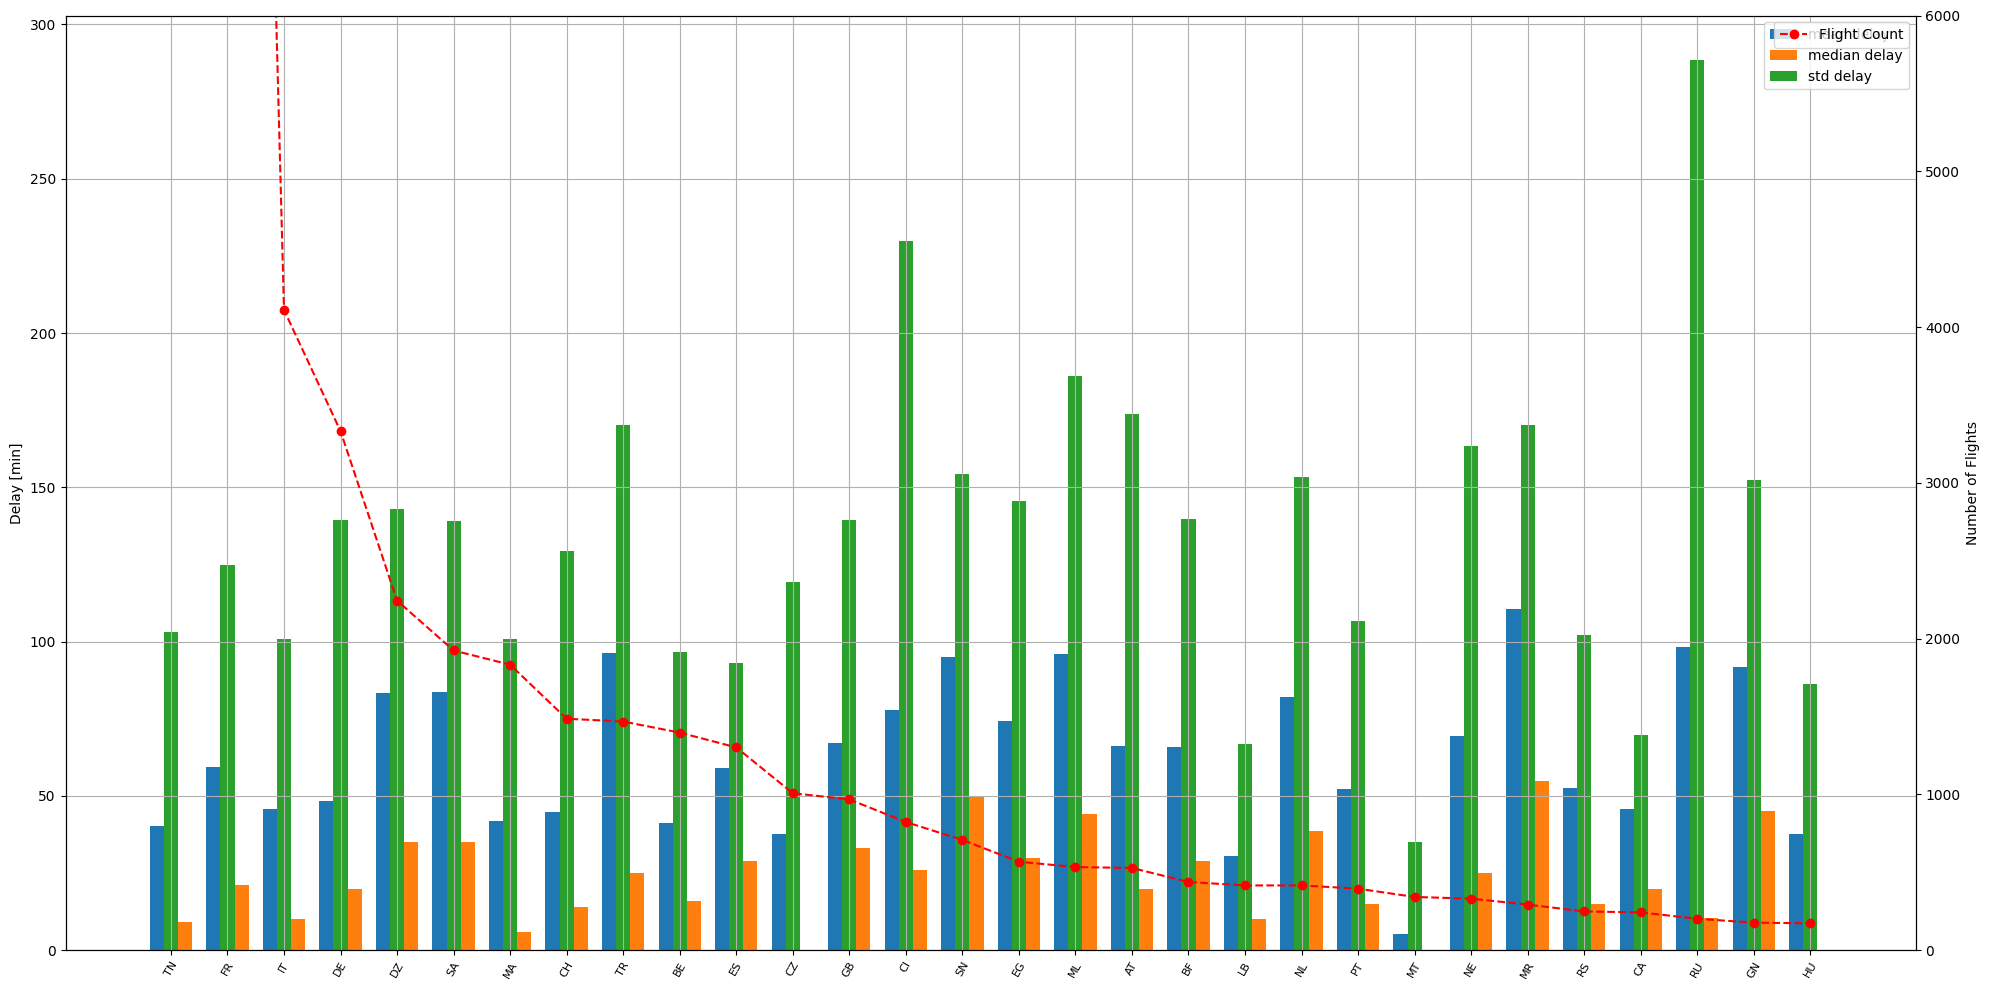

In [120]:
fig, ax1 = plt.subplots(figsize=(20, 10))

top_AC = grouped_DEP_country.head(30)

bar_width = 0.25
x = np.arange(len(top_AC['DEP_country']))

ax1.bar(x - bar_width, top_AC['mean'], bar_width, label='mean delay')
ax1.bar(x + bar_width, top_AC['median'], bar_width, label='median delay')
ax1.bar(x, top_AC['std'], bar_width, label='std delay')

ax1.set_ylabel('Delay [min]')
ax1.set_xticks(x)
ax1.set_xticklabels(top_AC['DEP_country'], rotation=60, fontsize=8)
ax1.legend()
ax1.grid(True)


ax2 = ax1.twinx()
ax2.plot(x, top_AC['count'], color='red', marker='o', linestyle='--', label='Flight Count')
ax2.set_ylabel('Number of Flights')
ax2.legend(loc='upper right')
ax2.set_ylim(bottom=0, top=6000)

plt.tight_layout()
plt.show()

In [ ]:
def plotbar(df, heads=5):
    fig, ax1 = plt.subplots(figsize=(20, 10))

    top_AC = df.head(heads)

    bar_width = 0.25
    x = np.arange(len(top_AC['DEP_country']))

    ax1.bar(x - bar_width, top_AC['mean'], bar_width, label='mean delay')
    ax1.bar(x + bar_width, top_AC['median'], bar_width, label='median delay')
    ax1.bar(x, top_AC['std'], bar_width, label='std delay')

    ax1.set_ylabel('Delay [min]')
    ax1.set_xticks(x)
    ax1.set_xticklabels(top_AC['DEP_country'], rotation=60, fontsize=8)
    ax1.legend()
    ax1.grid(True)


    ax2 = ax1.twinx()
    ax2.plot(x, top_AC['count'], color='red', marker='o', linestyle='--', label='Flight Count')
    ax2.set_ylabel('Number of Flights')
    ax2.legend(loc='upper right')
    ax2.set_ylim(bottom=0, top=6000)

    plt.tight_layout()
    plt.show()